In [2]:
%load_ext watermark
%watermark -a '201720723 박수린' -u -d -p numpy,pandas,matplotlib,seaborn,sklearn,pydotplus

201720723 박수린 
last updated: 2020-05-08 

numpy 1.18.1
pandas 1.0.2
matplotlib 3.1.3
seaborn 0.10.0
sklearn 0.0
pydotplus 2.0.2


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

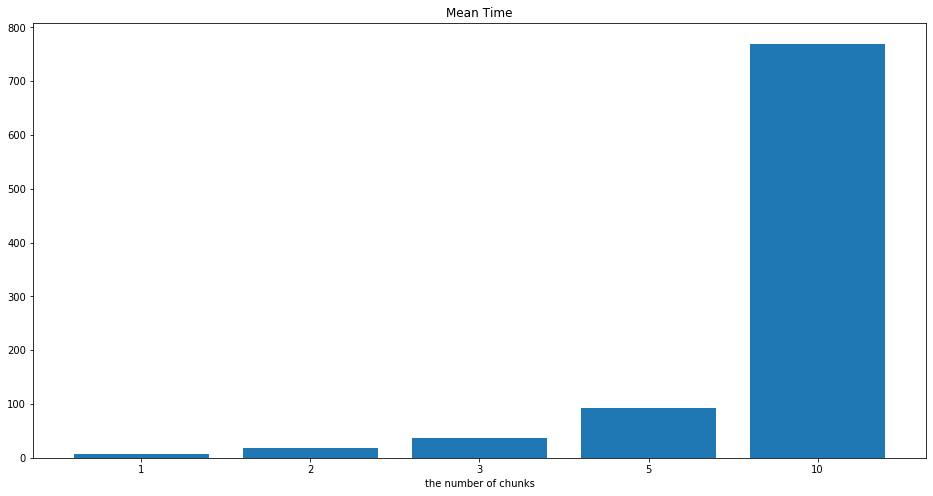

In [5]:
chatty_characters = ['1','2','3','5','10']
chatty_sentences = [6.2826, 18.7067, 36.3351, 93.4790, 769.7971]

plt.figure(figsize=(16, 8))
plt.bar(chatty_characters, chatty_sentences)
plt.title("Mean Time")
plt.xlabel("the number of chunks")
plt.show()

In [58]:
df = pd.read_csv('./online_classroom_data.csv')
df.drop('i', axis=1, inplace=True)
feature_names = list(df.columns)
feature_names.remove('Approved')

# sns.pairplot(vars=feature_names, hue="Approved", data=df)
# plt.show()

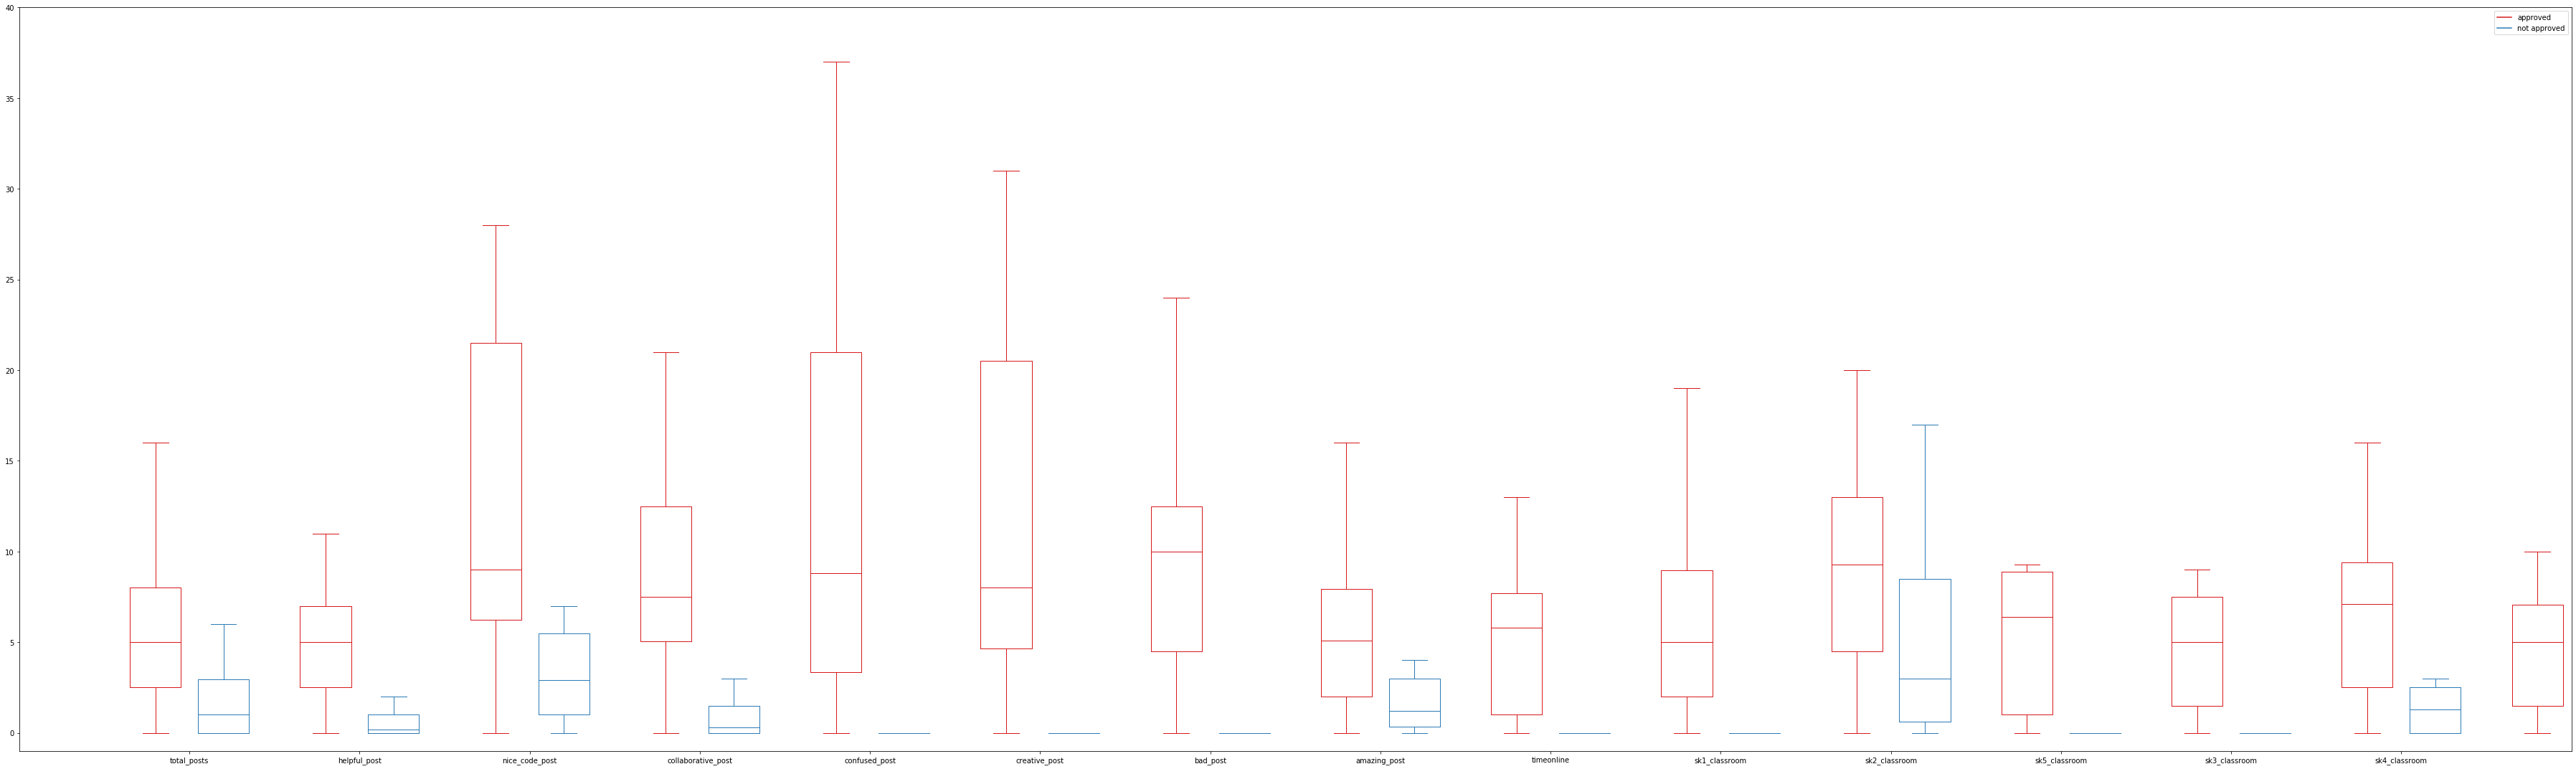

In [59]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

approved_data = df[df['Approved'] == 1]
not_approved_data = df[df['Approved'] == 0]

plt.figure(figsize=(50, 15))

bp_approved = plt.boxplot(approved_data, positions=np.array(range(len(approved_data)))*2.0-0.4, sym='', widths=0.6)
bp_not_approved = plt.boxplot(not_approved_data, positions=np.array(range(len(not_approved_data)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bp_approved, '#D7191C')
set_box_color(bp_not_approved, '#2C7BB6')

plt.plot([], c='#D7191C', label='approved')
plt.plot([], c='#2C7BB6', label='not approved')
plt.legend()

plt.xticks(range(0, len(feature_names) * 2, 2), feature_names)
plt.xlim(-2, len(feature_names)*2)
plt.ylim(-1, 40)
plt.tight_layout()


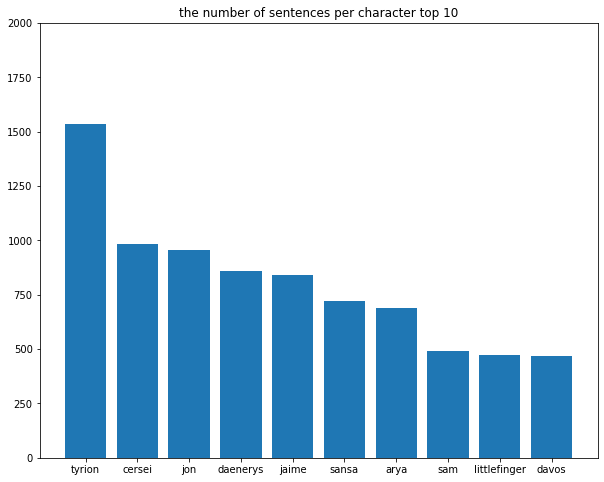

In [60]:
df = pd.read_csv('./got_scripts_breakdown.csv', delimiter=';')

unique_characters = df['Name'].unique()
sentenceCount = pd.Series(index=unique_characters)

for name in unique_characters:
    sentence = df[df['Name'] == name].shape[0]
    sentenceCount[name] = sentence
    
chatty_characters = []
chatty_sentences = []
for i in range(0, 10):
    chatty = sentenceCount.idxmax()
    chatty_sentences.append(sentenceCount.max())
    chatty_characters.append(chatty)
    sentenceCount.drop(index=chatty, inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(chatty_characters, chatty_sentences)
plt.title("the number of sentences per character top 10")
plt.ylim(0, 2000)
plt.show()

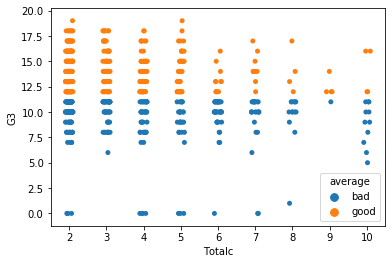

In [104]:
df = pd.read_csv('./student-por.csv')
df['Totalc'] = df['Dalc'] + df['Walc']
ave = sum(df.G3)/float(len(df))
df['average'] = ['good' if i > ave else 'bad' for i in df.G3]
sns.stripplot(x='Totalc', y = 'G3', hue = 'average',data= df, jitter=True)